In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [4]:
import seaborn as sns

# 사재기

In [ ]:
first_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(first_path)
except:
    pass

In [5]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [11]:
folder_path = '/crawled_data/outlier_data/2022-05-02_2022-05-08/'
path = code_path + folder_path
df = pd.read_excel(path + '20220508_음원사재기_검색비율.xlsx')

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [13]:
df.head(10)

,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_94db590aa3970931424c41943545e518
0,주제,통검
1,범위,합계
2,기간,일간 : 2022-02-08 ~ 2022-05-08
3,성별,"전체(여성,남성)"
4,연령대,전체
5,날짜,음원 사재기
6,2022-02-08,65.55555
7,2022-02-09,72.22222
8,2022-02-10,61.11111
9,2022-02-11,62.22222


In [19]:
mod_df = df.iloc[6:, :].reset_index(drop=True)
mod_df.columns = ['날짜', '검색비율']
mod_df

,날짜,검색비율
0,2022-02-08,65.55555
1,2022-02-09,72.22222
2,2022-02-10,61.11111
3,2022-02-11,62.22222
4,2022-02-12,55.55555
...,...,...
85,2022-05-04,55.55555
86,2022-05-05,68.88888
87,2022-05-06,58.88888
88,2022-05-07,86.66666


In [21]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      90 non-null     object
 1   검색비율    90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [29]:
mod_df['검색비율'] = mod_df['검색비율'].astype(float)

In [30]:
start_date = '2022-04-25'
end_date = '2022-05-01'
new_start_date = '2022-05-02'
new_end_date = '2022-05-08'

In [31]:
before_df = mod_df[ (mod_df['날짜'] >= start_date) & (mod_df['날짜'] <= end_date)].reset_index(drop=True)
current_df = mod_df[ (mod_df['날짜'] >= new_start_date) & (mod_df['날짜'] <= new_end_date)].reset_index(drop=True)

In [32]:
before_search = before_df['검색비율'].sum()
current_search = current_df['검색비율'].sum()

In [34]:
b_search = round(before_search, 1)
c_search = round(current_search, 1)

In [36]:
search = [b_search, c_search]
search

[387.8, 455.6]

In [40]:
colors = sns.color_palette('RdBu', len(search))

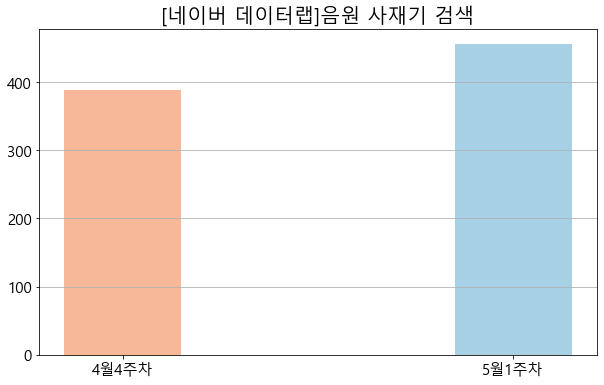

In [56]:
plt.figure( figsize=(10,6) )
plt.grid(True, axis='y')
plt.bar(['4월4주차', '5월1주차'], search, color=colors, width=0.3)
plt.title('[네이버 데이터랩]음원 사재기 검색', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [59]:
title_list = ['나의 월요일', 'LOVE', '꽃 길', 'D-Day']
artist_list = ['싸이 (PSY)', '몬스타엑스(Monsta X)', 'BIGBANG (빅뱅)', '휘인(Whee In)']
mean_rank_list = [34, 59, 30.5, 32]
dict = {'곡':title_list, '가수':artist_list, '순위변동평균(양수)':mean_rank_list}

mean_outlier_df = pd.DataFrame(dict)
mean_outlier_df

,곡,가수,순위변동평균(양수)
0,나의 월요일,싸이 (PSY),34.0
1,LOVE,몬스타엑스(Monsta X),59.0
2,꽃 길,BIGBANG (빅뱅),30.5
3,D-Day,휘인(Whee In),32.0


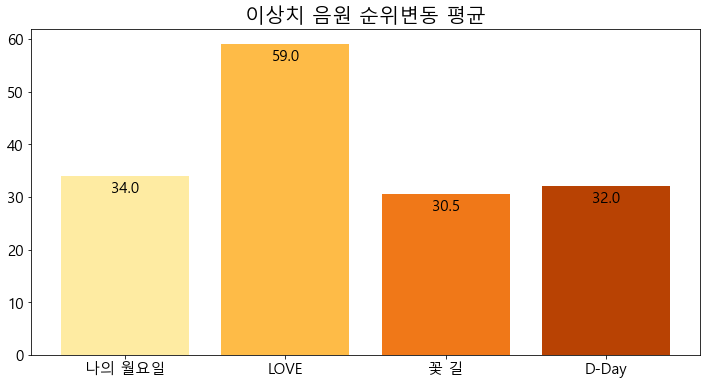

In [63]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette('YlOrBr', mean_outlier_df.shape[0])
plt.bar('곡', '순위변동평균(양수)', data=mean_outlier_df, color=colors)
plt.title('이상치 음원 순위변동 평균', fontdict={'size':20})
for i in range(mean_outlier_df.shape[0]):
    plt.text(i, mean_outlier_df['순위변동평균(양수)'][i] - mean_outlier_df.shape[0]*0.2, round(mean_outlier_df['순위변동평균(양수)'][i], 1), verticalalignment='top', horizontalalignment='center', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

# TJ

In [6]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [7]:
folder_path = '/crawled_data/outlier_data/2022-05-02_2022-05-08/tj/'
path = code_path + folder_path
try:
    os.chdir(path)
except:
    pass

In [8]:
file_list = os.listdir()
file_list

['나의사춘기에게.xlsx',
 '미안해.xlsx',
 '보여줄게.xlsx',
 '사랑에연습이있었다면.xlsx',
 '시든꽃에물을주듯.xlsx',
 '주저하는연인들을위해.xlsx',
 '질풍가도.xlsx',
 '취기를빌려(취향저격그녀 X 산들).xlsx']

In [11]:
temp_name = file_list[0]
temp = pd.read_excel(temp_name)
temp.head()

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,url,http://datalab.naver.com/keyword/trendResult.naver?hashKey=N_c93f3a4cf744318307c1b42eae331d19
0,주제,통검
1,범위,합계
2,기간,일간 : 2022-02-08 ~ 2022-05-08
3,성별,"전체(여성,남성)"
4,연령대,전체


In [12]:
mod_df = temp.iloc[6:, :].reset_index(drop=True)
mod_df.columns = ['날짜', '검색비율']
mod_df

,날짜,검색비율
0,2022-02-08,9.05598
1,2022-02-09,8.06805
2,2022-02-10,8.31503
3,2022-02-11,8.94621
4,2022-02-12,8.12294
...,...,...
85,2022-05-04,28.01866
86,2022-05-05,67.89242
87,2022-05-06,100.0
88,2022-05-07,87.89791


In [13]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      90 non-null     object
 1   검색비율    90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [14]:
mod_df['검색비율'] = mod_df['검색비율'].astype(float)

In [18]:
start_date3 = '2022-04-11'
end_date3 = '2022-04-17'
start_date2 = '2022-04-18'
end_date2 = '2022-04-24'
start_date1 = '2022-04-25'
end_date1 = '2022-05-01'
new_start_date = '2022-05-02'
new_end_date = '2022-05-08'

In [19]:
before_df3 = mod_df[ (mod_df['날짜'] >= start_date3) & (mod_df['날짜'] <= end_date3)].reset_index(drop=True)
before_df2 = mod_df[ (mod_df['날짜'] >= start_date2) & (mod_df['날짜'] <= end_date2)].reset_index(drop=True)
before_df1 = mod_df[ (mod_df['날짜'] >= start_date1) & (mod_df['날짜'] <= end_date1)].reset_index(drop=True)
current_df = mod_df[ (mod_df['날짜'] >= new_start_date) & (mod_df['날짜'] <= new_end_date)].reset_index(drop=True)

In [37]:
before_search3 = before_df3['검색비율'].sum()
before_search2 = before_df2['검색비율'].sum()
before_search1 = before_df1['검색비율'].sum()
current_search = current_df['검색비율'].sum()

In [38]:
b_search3 = round(before_search3, 1)
b_search2 = round(before_search2, 1)
b_search1 = round(before_search1, 1)
c_search = round(current_search, 1)

In [39]:
search = [b_search3, b_search2, b_search1, c_search]
search

[82.5, 76.2, 235.4, 404.1]

In [40]:
colors = sns.color_palette('RdBu', len(search))

In [41]:
title = temp_name.split('.')[0]
title

'나의사춘기에게'

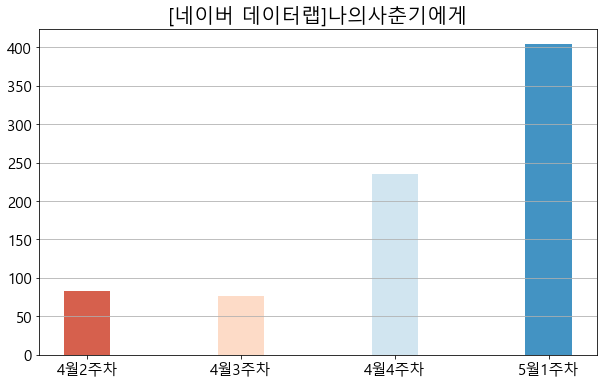

In [43]:
plt.figure( figsize=(10,6) )
plt.grid(True, axis='y', zorder=0)
plt.bar(['4월2주차', '4월3주차', '4월4주차', '5월1주차'], search, color=colors, width=0.3, zorder=1)
plt.title(f'[네이버 데이터랩]{title}', fontdict={'size':20})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


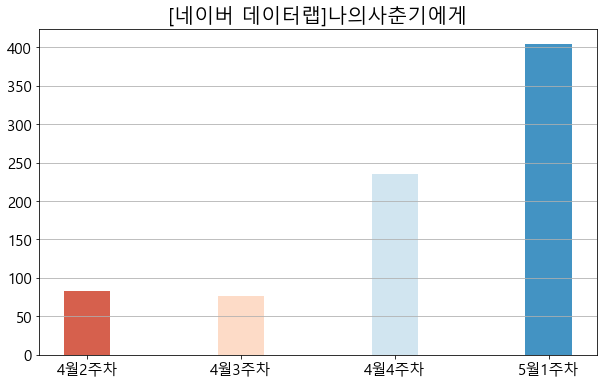

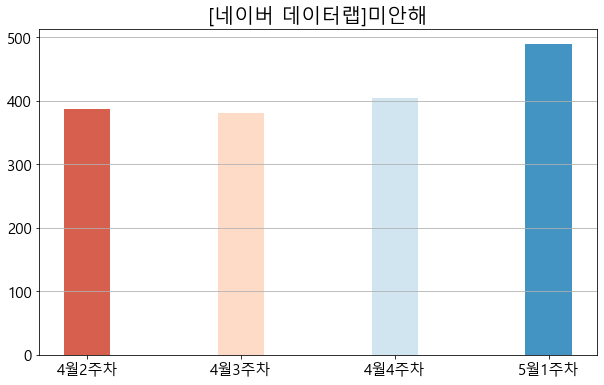

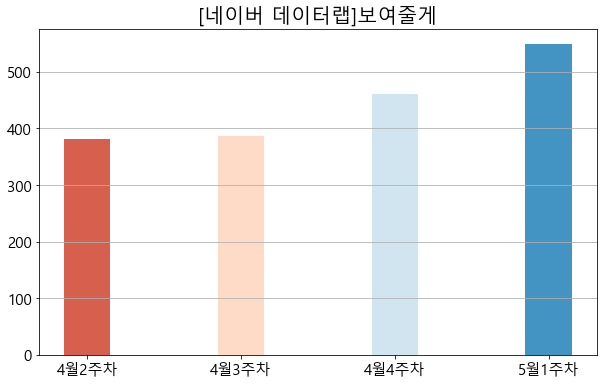

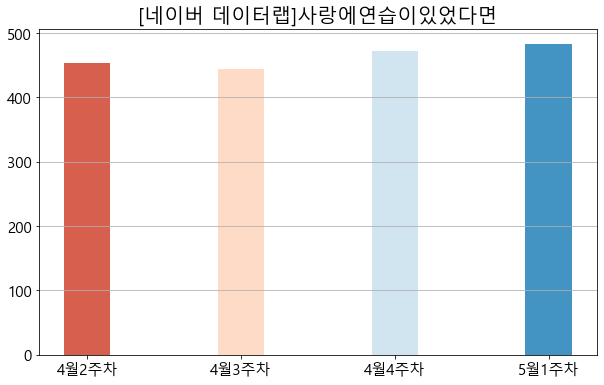

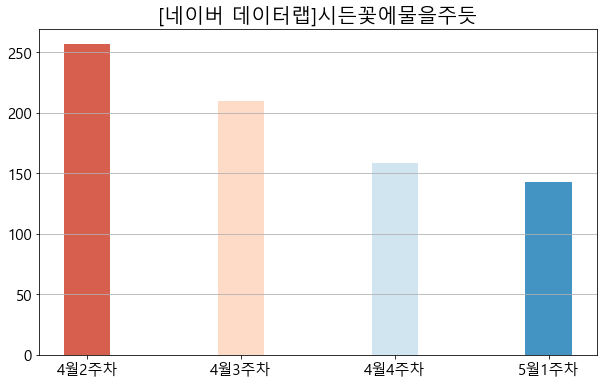

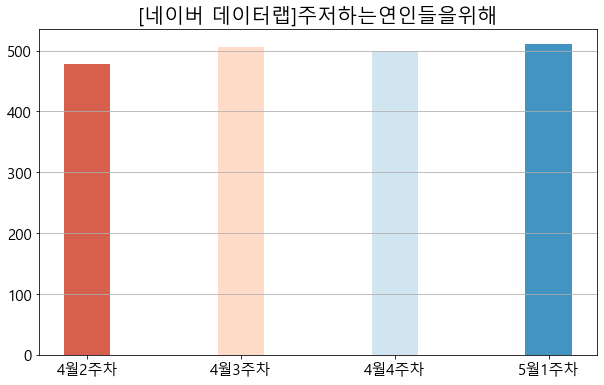

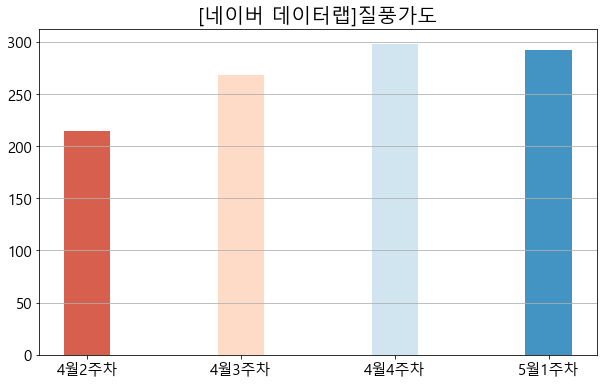

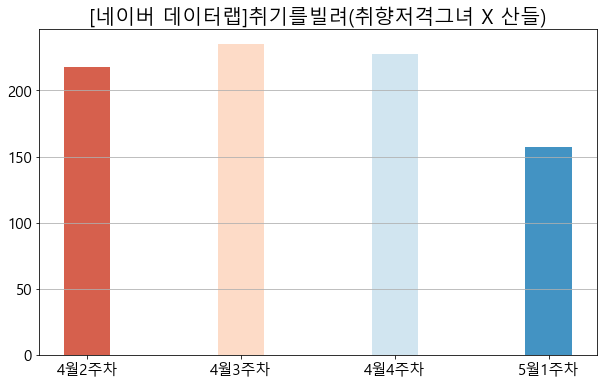

In [44]:
for one_file in file_list:
    temp = pd.read_excel(one_file)
    mod_df = temp.iloc[6:, :].reset_index(drop=True)
    mod_df.columns = ['날짜', '검색비율']
    mod_df['검색비율'] = mod_df['검색비율'].astype(float)
    start_date3 = '2022-04-11'
    end_date3 = '2022-04-17'
    start_date2 = '2022-04-18'
    end_date2 = '2022-04-24'
    start_date1 = '2022-04-25'
    end_date1 = '2022-05-01'
    new_start_date = '2022-05-02'
    new_end_date = '2022-05-08'
    before_df3 = mod_df[ (mod_df['날짜'] >= start_date3) & (mod_df['날짜'] <= end_date3)].reset_index(drop=True)
    before_df2 = mod_df[ (mod_df['날짜'] >= start_date2) & (mod_df['날짜'] <= end_date2)].reset_index(drop=True)
    before_df1 = mod_df[ (mod_df['날짜'] >= start_date1) & (mod_df['날짜'] <= end_date1)].reset_index(drop=True)
    current_df = mod_df[ (mod_df['날짜'] >= new_start_date) & (mod_df['날짜'] <= new_end_date)].reset_index(drop=True)
    before_search3 = before_df3['검색비율'].sum()
    before_search2 = before_df2['검색비율'].sum()
    before_search1 = before_df1['검색비율'].sum()
    current_search = current_df['검색비율'].sum()
    b_search3 = round(before_search3, 1)
    b_search2 = round(before_search2, 1)
    b_search1 = round(before_search1, 1)
    c_search = round(current_search, 1)
    search = [b_search3, b_search2, b_search1, c_search]
    colors = sns.color_palette('RdBu', len(search))
    title = one_file.split('.')[0]
    plt.figure( figsize=(10,6) )
    plt.grid(True, axis='y', zorder=0)
    plt.bar(['4월2주차', '4월3주차', '4월4주차', '5월1주차'], search, color=colors, width=0.3, zorder=1)
    plt.title(f'[네이버 데이터랩]{title}', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15);